In [42]:
%matplotlib inline

In [43]:
import os
import glob

import numpy as np
import pylab as plt

import astra
import tomopy
# import cv2
from pprint import pprint
import h5py

import astra

In [44]:
def log_progress(sequence, every=None, size=None):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = size / 200     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{index} / ?'.format(index=index)
                else:
                    progress.value = index
                    label.value = u'{index} / {size}'.format(
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = str(index or '?')

In [45]:
working_dir = '/home/makov/diskmnt/big/tomo_data/bukreeva/spine_microfill1/data'

In [46]:
config_file = '/home/makov/diskmnt/big/tomo_data/bukreeva/spine_microfill1/data/spine_microfil1_.log'

In [ ]:
# %load /home/makov/diskmnt/big/tomo_data/bukreeva/spine_microfill1/data/spine_microfil1_.log
User ID : e14251
FAST-TOMO scan of sample spine_microfil1_ started on Fri Jun 21 09:26:23 2013 
--------------------Beamline Settings-------------------------
Ring current [mA]           : 400.677 
Beam energy  [keV]          : 23.999 
Monostripe                  : W/Si 
FE-Filter                   : Filter 50% 
OP-Filter 1                 : 100um Al 
OP-Filter 2                 : 10um Cu 
OP-Filter 3                 : 10um Fe 
--------------------Detector Settings-------------------------
Camera                      : PCO.Edge 
Microscope                  : Opt.Peter MB op 
Magnification               :  4.00 
Scintillator                : LuAG:Ce 100um 
Exposure time [ms]          : 275 
Delay time [ms]             : 0 
Millisecond shutter [ms]    : not used
X-ROI                       : 1 - 2560
Y-ROI                       : 360 - 1500
Actual pixel size [um]      : 1.62
------------------------Scan Settings-------------------------
Sample folder                : /sls/X02DA/data/e14251/Data10/disk1/spine_microfil1_ 
File Prefix                  : spine_microfil1_ 
Number of scans              : 1 
Number of projections        : 1601 
Number of darks              : 32 
Number of flats              : 160 
Number of inter-flats        : 0
Flat frequency               : 0
Readout frequency            : 0 
Rot Y min position  [deg]    : 0.000 
Rot Y max position  [deg]    : 180.000 
Angular step [deg]           : 0.113 
Sample In   [um]             :     0 
Sample Out  [um]             : 10000 
-----------------------Sample coordinates---------------------
X-coordinate                 : -1002.20 
Y-coordinate                 : 10200.00 
Z-coordinate                 : 26390.00 
XX-coordinate                : -2769.40 
ZZ-coordinate                : 1215.36 
--------------------------------------------------------------
TOMOGRAPHIC SCAN FINISHED at Fri Jun 21 09:36:36 2013 
Lines used for estimate: 1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 801, 851, 901, 951, 1001, 1051, 1101
Rotation center: 1494.61
Rotation center (non padded): 1494.61
------------------------------------------------------------

-------------- Projection information -------------------
Original tif projections        2560x1140 pixels
Total size of Tiff projections   11399664 kB
------------- Reconstruction parameters -----------------
Used algorithm             GridRec
Reconstruction directory   /sls/X02DA/data/e14251/Data10/disk1/spine_microfil1_/rec_8bit/
Center                     1494.50
Filter                     Parzen
Rotation                   0.00
Geometry                   Homogeneous angular projection distribution between 0 and pi
Binning for reconstruction 1
Roi for reconstruction     0,0,0,0
Ring removal               Off
Zinger removal             Off
Output format              TIFF8   Scaling parameters -0.0002,0.0008
Zero Padding               0.50
------------- Reconstruction Information -----------------
Size of reconstructed slice 6.55 MB
Size of reconstructed dataset 7.47 GB




In [48]:
flat_files = glob.glob(os.path.join(working_dir,'flat','*.tif'))
flat_files = sorted(flat_files)
print len(flat_files)
# pprint(flat_files)

dark_files = glob.glob(os.path.join(working_dir,'dark','*.tif'))
dark_files = sorted(dark_files)
print(len(dark_files))
# pprint(dark_files)

data_files = glob.glob(os.path.join(working_dir,'proj', '*.tif'))
data_files = sorted(data_files)
print(len(data_files))
# # pprint(data_files)

# all_files = glob.glob(os.path.join(working_dir,'*.edf'))
# other_files = set(all_files)-set(data_files)-set(dark_files)-set(ref_files)

# # pprint(other_files)


160
32
1601


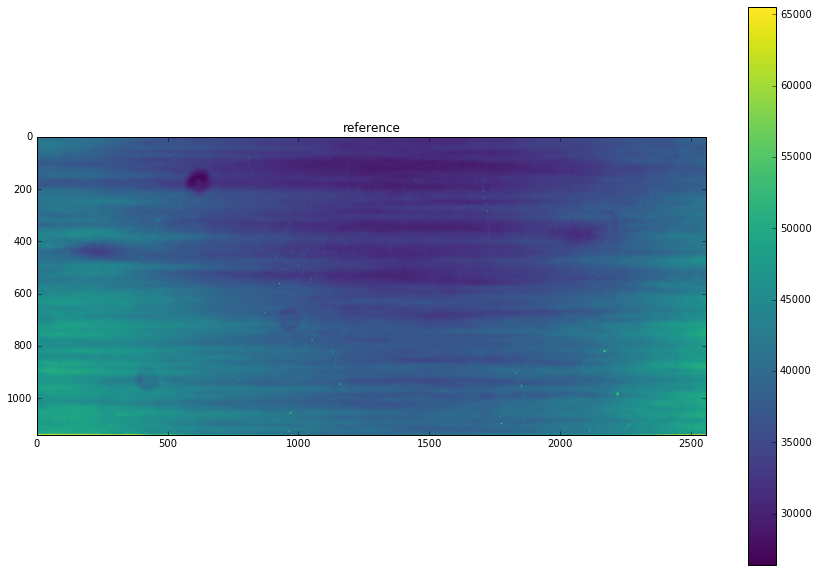

In [49]:
mean_flat = None
for flat_file in flat_files:
    tf = plt.imread(flat_files[0]).astype('float32')
    if mean_flat is None:
        mean_flat = np.zeros_like(tf)
    mean_flat = mean_flat+tf

mean_flat = mean_flat/len(flat_files)

plt.figure(figsize=(15,10))
plt.imshow(mean_flat, cmap=plt.cm.viridis)
plt.colorbar()
plt.title('reference')
plt.show()

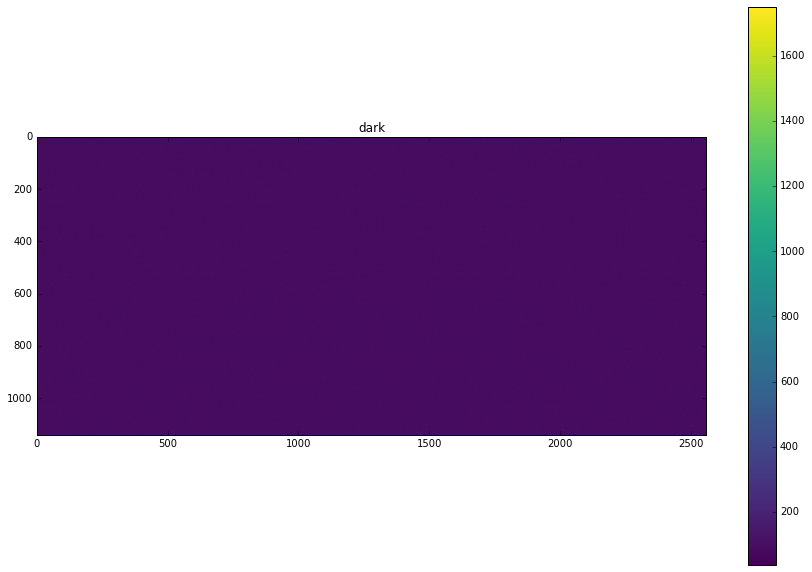

In [50]:
mean_dark = None
for dark_file in dark_files:
    td = plt.imread(dark_files[0]).astype('float32')
    if mean_dark is None:
        mean_dark = np.zeros_like(td)
    mean_dark = mean_dark+td

mean_dark = mean_dark/len(dark_files)

plt.figure(figsize=(15,10))
plt.imshow(mean_dark, cmap=plt.cm.viridis)
plt.colorbar()
plt.title('dark')
plt.show()

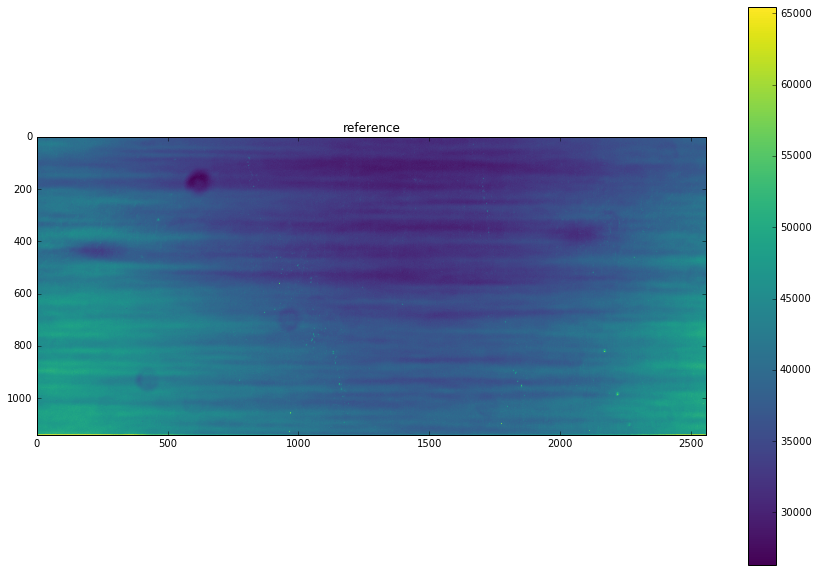

In [51]:
mean_flat = mean_flat-mean_dark
mean_flat[mean_flat<0]=0

plt.figure(figsize=(15,10))
plt.imshow(mean_flat, cmap=plt.cm.viridis)
plt.colorbar()
plt.title('reference')
plt.show()

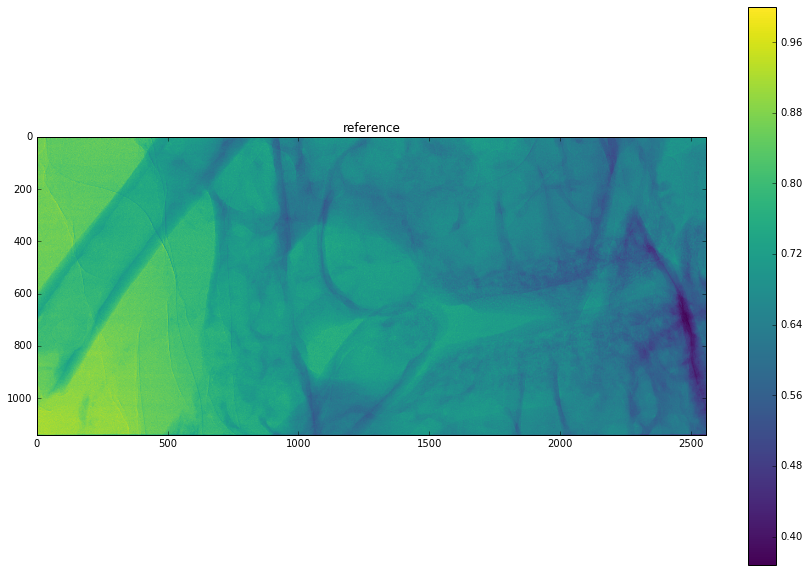

In [52]:
data  = plt.imread(data_files[-1]).astype('float32')
data = data-mean_dark

data = data/mean_flat

plt.figure(figsize=(15,10))
plt.imshow(data, cmap=plt.cm.viridis)
plt.colorbar()
plt.title('reference')
plt.show()

In [53]:
import numba
fast_retrieve_phase=numba.jit()(tomopy.prep.phase.retrieve_phase)

In [54]:
xt = np.expand_dims(data[::], axis=0)
xp = fast_retrieve_phase(xt[:,:], pixel_size=1.62e-4,
                                      dist=21,
                                      energy=24) # distances in [cm], energy [kev]

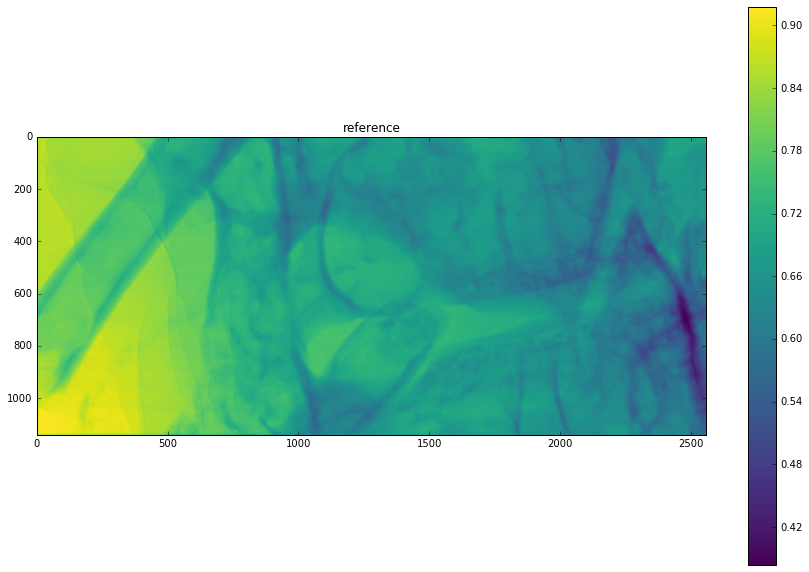

In [55]:
plt.figure(figsize=(15,10))
plt.imshow(np.squeeze(xp), cmap=plt.cm.viridis)
plt.colorbar()
plt.title('reference')
plt.show()

In [56]:
distance = 21
tmp_sino_file = '/home/makov/diskmnt/fast/inna/sino_spine_microfill_{}.h5'.format(distance)

In [57]:
for distance in log_progress([21,]):
    tmp_sino_file = '/home/makov/diskmnt/fast/inna/sino_spine_microfill_{}.h5'.format(distance)
    if not os.path.exists(tmp_sino_file):
        with h5py.File(tmp_sino_file,'w') as h5f:
            for idf,f in enumerate(log_progress(data_files)):
                d = plt.imread(f)
                d = (d-mean_dark)/mean_flat
                dt = np.expand_dims(d, axis=0)
                xp = fast_retrieve_phase(dt, pixel_size=1.62e-4, dist=distance, energy=24)
    #             xp = dt
                h5f.create_dataset(str(idf), data=np.squeeze(xp), compression="lzf")

In [121]:
# if not os.path.exists(tmp_sino_file):
#     with h5py.File(tmp_sino_file,'w') as h5f:
#         for idf,f in enumerate(log_progress(data_files)):
#             d = plt.imread(f)
#             d = (d-mean_dark)/mean_flat
#             dt = np.expand_dims(d[1800:1810], axis=0)
#             xp = fast_retrieve_phase(dt, pixel_size=0.65e-4, dist=10, energy=24)
# #             xp = dt
#             h5f.create_dataset(str(idf), data=np.squeeze(xp), compression="lzf")

In [18]:
sinogram_list = []
raw = 9
with h5py.File(tmp_sino_file) as h5f:
    for idk, k in enumerate(log_progress(range(len(h5f.keys())))):
        sinogram_list.append(h5f[str(idk)][raw])
sinogram = np.array(sinogram_list)
%xdel sinogram_list

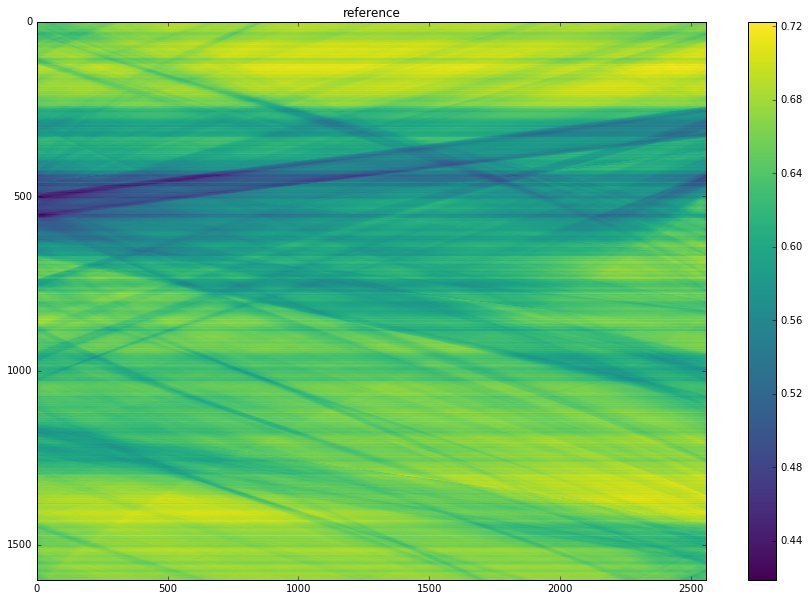

In [19]:
plt.figure(figsize=(15,10))
plt.imshow(sinogram, cmap=plt.cm.viridis)
plt.axis('tight')
plt.colorbar()
plt.title('reference')
plt.show()

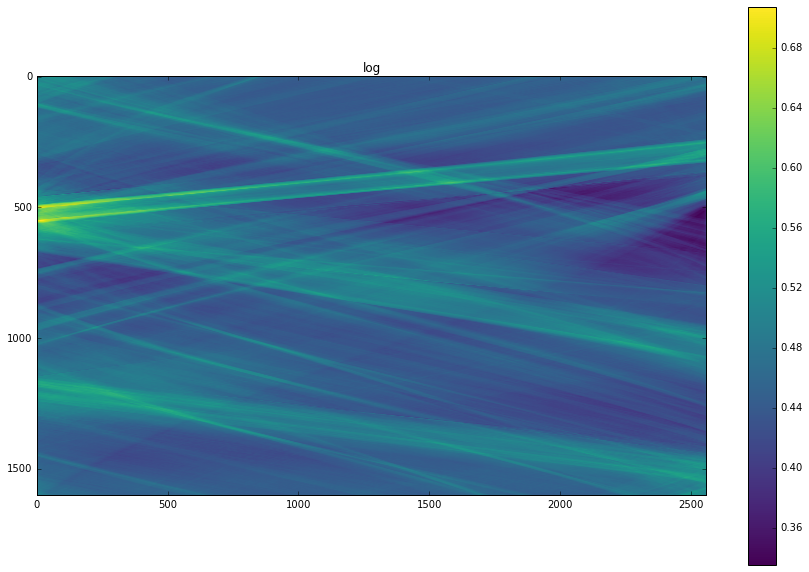

In [23]:
sino_pp = sinogram.T/sinogram.sum(axis=-1)*sinogram.sum(axis=-1).mean()
sino_pp = sino_pp.T

# sino_pp = sinogram.T-sinogram.min(axis=-1)
# sino_pp = sino_pp.T+0.01

# sino_pp = sino_pp - sino_pp.min()+0.01


sino_pp_log = -np.log(sino_pp)

plt.figure(figsize=(15,10))
plt.imshow(sino_pp_log, cmap=plt.cm.viridis)
plt.colorbar()
plt.title('log')
plt.show()

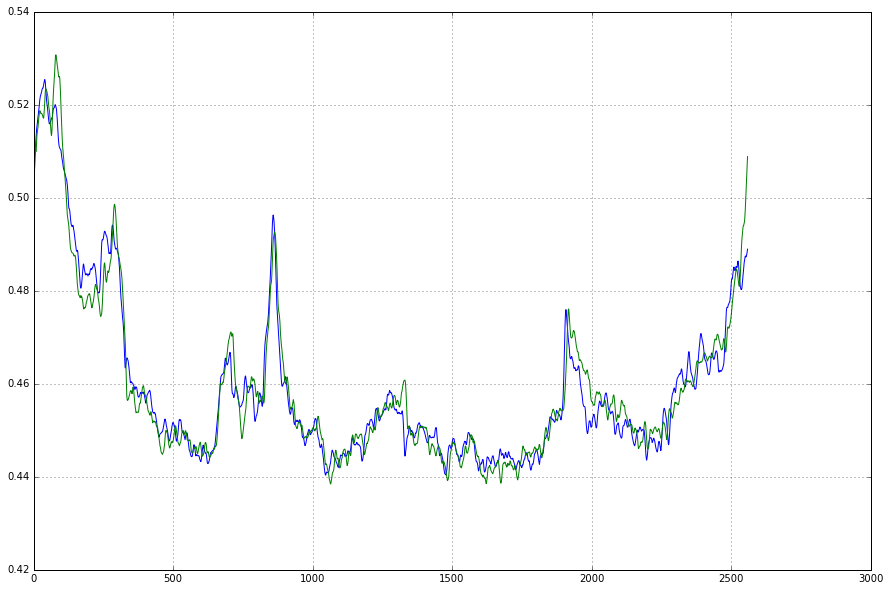

In [24]:
plt.figure(figsize=(15,10))
plt.plot(sino_pp_log[0])
plt.plot(np.flipud(sino_pp_log[-1]))
plt.grid()
plt.show()

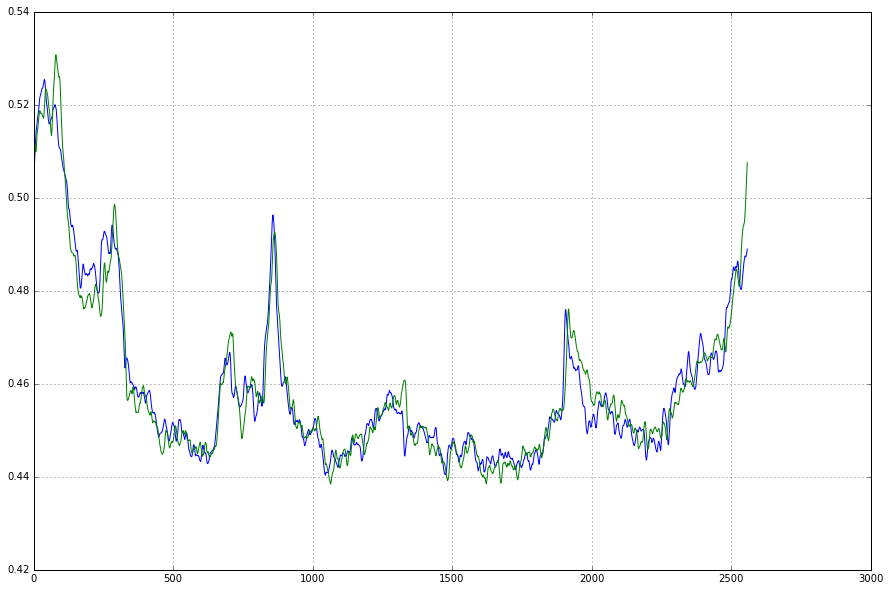

In [25]:
delta = 1
s0 = sino_pp_log[0][delta:]
s1 = np.flipud(sino_pp_log[-1][delta:])
plt.figure(figsize=(15,10))
plt.plot(s0)
plt.plot(s1)
# plt.plot((s0-s1)*10)
plt.grid()
plt.show()

In [26]:
def build_reconstruction_geomety(detector_size, angles):
    proj_geom = astra.create_proj_geom('parallel', 1.0, detector_size, angles)
    return proj_geom

In [27]:
def astra_tomo2d(sinogram, angles):
    angles = angles.astype('float64') # hack for astra stability, may be removed in future releases
    detector_size = sinogram.shape[1]
    

    rec_size = detector_size# size of reconstruction region
    vol_geom = astra.create_vol_geom(rec_size, rec_size)

    proj_geom = build_reconstruction_geomety(detector_size, angles)
    
    sinogram_id = astra.data2d.create('-sino', proj_geom, data=sinogram)
    # Create a data object for the reconstruction
    rec_id = astra.data2d.create('-vol', vol_geom)

    # Set up the parameters for a reconstruction algorithm using the GPU
    cfg = astra.astra_dict('FBP_CUDA')
    cfg['ReconstructionDataId'] = rec_id
    cfg['ProjectionDataId'] = sinogram_id
    cfg['option'] = {}
#     cfg['option']['ShortScan'] = True
#     cfg['option']['MinConstraint'] = 0
#     cfg['option']['MaxConstraint'] = 0.02

    # Available algorithms:
    # SIRT_CUDA, SART_CUDA, EM_CUDA, FBP_CUDA (see the FBP sample)

    # Create the algorithm object from the configuration structure
    alg_id = astra.algorithm.create(cfg)

    # Run 150 iterations of the algorithm
    astra.algorithm.run(alg_id, 1000)
    # Get the result
    rec = astra.data2d.get(rec_id)

    # Clean up. Note that GPU memory is tied up in the algorithm object,
    # and main RAM in the data objects.
    astra.algorithm.delete(alg_id)
    astra.data2d.delete(rec_id)
    astra.data2d.delete(sinogram_id)
    astra.clear()
    return rec, proj_geom, cfg

In [28]:
slices = np.arange(sino_pp_log.shape[0],dtype='float32') 
angles = slices/len(slices-1)*180*np.pi/180.

In [53]:
tomo_source = sino_pp_log.copy()
# tomo_source_t = tomo_source
tomo_source_t = tomo_source-tomo_source.min()

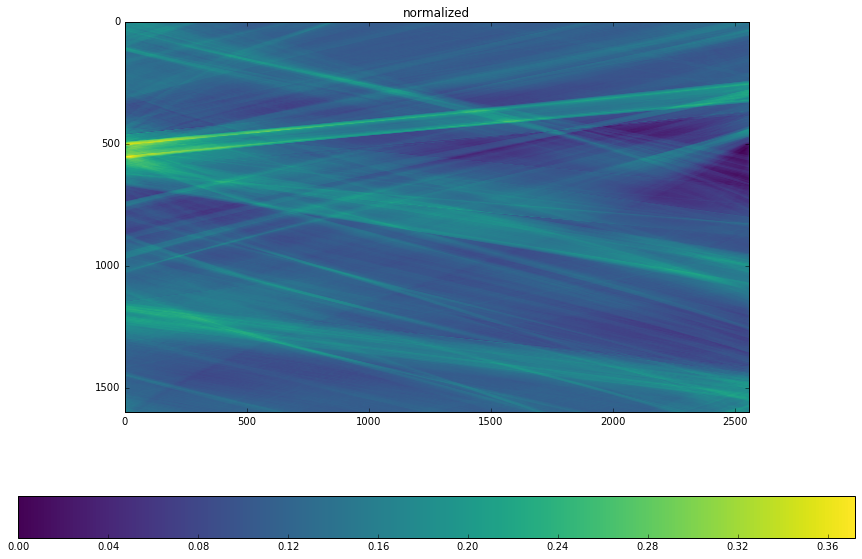

In [54]:
plt.figure(figsize=(15,10))
plt.imshow(tomo_source_t, cmap=plt.cm.viridis)
plt.colorbar(orientation='horizontal')
plt.title('normalized')
plt.show()

In [55]:
# trh =16
# tomo_source_t[tomo_source_t>trh]=trh
tomo_source_t = tomo_source_t/tomo_source_t.sum(axis=0)*np.sqrt(np.sum(tomo_source_t))

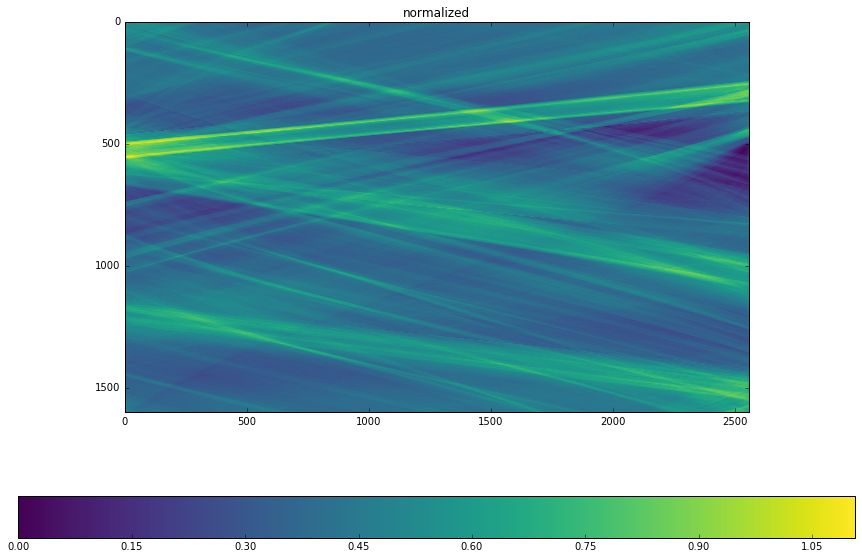

In [56]:
plt.figure(figsize=(15,10))
plt.imshow(tomo_source_t, cmap=plt.cm.viridis)
plt.colorbar(orientation='horizontal')
plt.title('normalized')
plt.show()

In [57]:
rec, proj_geom, cfg = astra_tomo2d(tomo_source_t, angles)

In [58]:
rec=rec/np.mean(rec)
print rec.shape

(2560, 2560)


### Реконструкция My

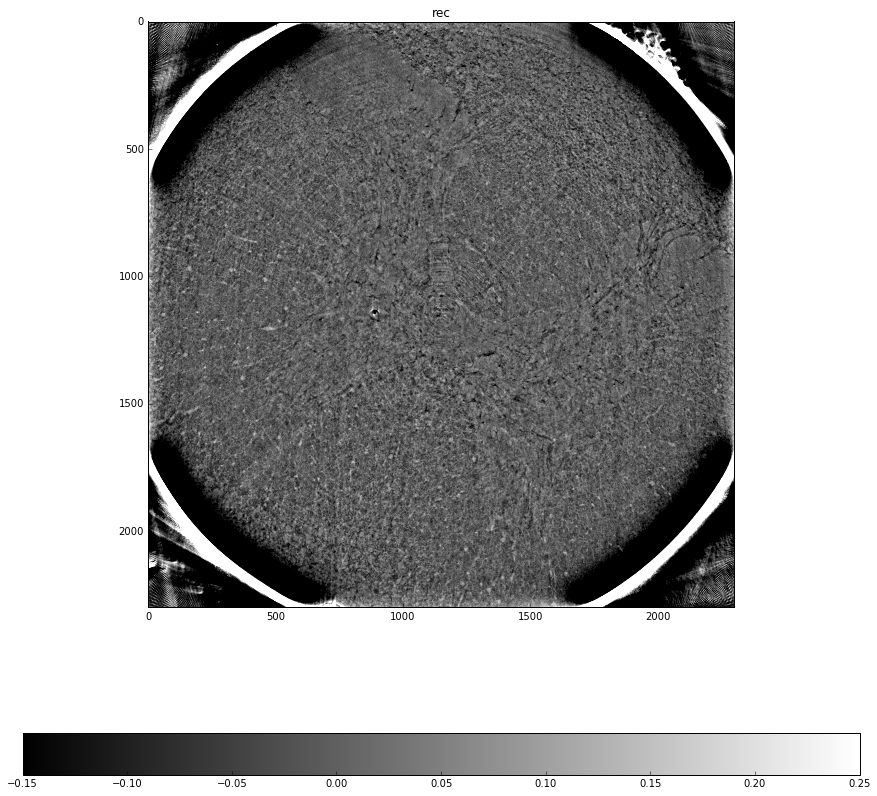

In [59]:
from scipy.ndimage import gaussian_filter
rs = np.array(rec.shape)//2
radius=1150
rec_t = rec[rs[0]-radius:rs[0]+radius,rs[1]-radius:rs[1]+radius]
    
mask = gaussian_filter(rec_t,50)
plt.figure(figsize=(15,15))
# plt.imshow(rec,vmin=0.1, vmax=0.2)
plt.imshow(rec_t-mask, cmap=plt.cm.gray,vmin=-0.15,vmax=0.25)
plt.colorbar(orientation='horizontal')
plt.title('rec')
plt.imsave('1809.tiff', rec_t-mask, cmap=plt.cm.gray,vmin=-0.15,vmax=0.25)
plt.show()

### Реконструкция FBP + коррекция колец

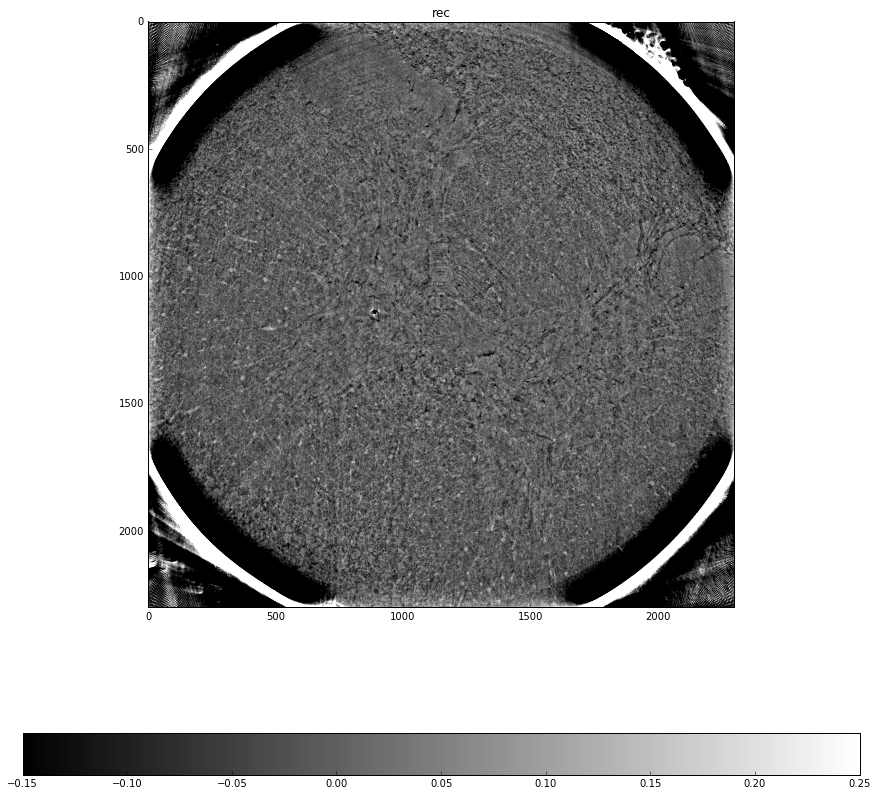

In [244]:
# rs = rec.shape[0]//2
# radius=900
rc = tomopy.misc.corr.remove_ring(np.expand_dims(rec_t-mask, axis=0),
                                  thresh=0.3,  theta_min=90, rwidth=30)
rc = np.squeeze(rc)
plt.figure(figsize=(15,15))
# plt.imshow(rec,vmin=0.1, vmax=0.2)
plt.imshow(rc, cmap=plt.cm.gray,vmin=-0.15,vmax=0.25)
plt.colorbar(orientation='horizontal')
plt.imsave('1809_ring_postproc.tiff', rc, cmap=plt.cm.gray,vmin=-0.15,vmax=0.25)
plt.title('rec')
plt.show()

In [136]:
from skimage.io import imread

In [137]:
ref = imread(
    '/home/makov/diskmnt/big/tomo_data/bukreeva/ESRF_osso_2016/spine_mf_10x_mf/tom_pulito_girato/Reslice of Reslice0181.tif')

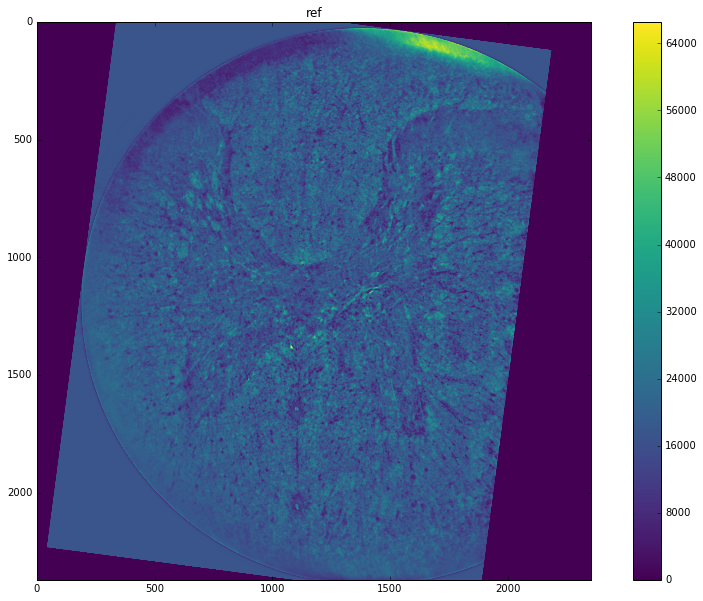

In [138]:
plt.figure(figsize=(15,10))
# plt.imshow((rc-rec)[1200:1800,1200:1800], cmap=plt.cm.viridis)
plt.imshow(ref, cmap=plt.cm.viridis)
# plt.imshow(rc[1000:2000,1000:2000])
plt.colorbar()
plt.title('ref')
plt.show()